# Heatmap comparison
> Compare heatmap for different training parameter

In [ ]:
#| default_exp training.hyperparameter_search

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| export
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import os

In [ ]:
!which python

/home/ai_dsx/virtualenvs/p311_anomalib_v1/bin/python


In [ ]:
#| export
custom_lib_path = Path(r'/home/ai_warstein/homes/goni/custom_libs')
sys.path.append(str(custom_lib_path))


In [ ]:
#| export
from be_vision_ad_tools.inference.prediction_system import *

In [ ]:
#from cv_tools.imports import *
#from cv_tools.core import *
#from dotenv import load_dotenv


In [ ]:
#load_dotenv(dotenv_path=f'/home/ai_dsx.work/data/projects/be-vision-ad-tools/be-vision-ad-tools/.env')

In [ ]:
#| export
CURRETNT_NB='/home/ai_dsx.work/data/projects/be-vision-ad-tools/nbs'

In [ ]:
#| export
# Import our training functions
from be_vision_ad_tools.training.flexible_trainer import (
    FlexibleTrainingConfig, train_anomaly_model, ModelType, BackboneType
)


In [ ]:
#| export
from typing import List, Dict, Any, Union, Optional, Tuple
from pathlib import Path
from datetime import datetime
import json
import time
from itertools import product


In [ ]:
max_epochs = 1
data_root = "/home/ai_dsx.work/data/projects/AD_tool_test/images"
normal_dir = "good"
abnormal_dir = "bad"
class_name = "hyperparam_search"
save_path = Path(data_root) / 'hyperparameter_models'


In [ ]:
model_names = ['padim']
backbones = ['resnet18', 'resnet50']
n_features_list = [100]
layers = [['layer1'], ['layer2'], ['layer1', 'layer2']]  # Different layer combinations
param_combinations = list(product(model_names, backbones, n_features_list, layers))
for i, (model_name, backbone, n_features, layer) in enumerate(param_combinations, 1):
    #print(f"\n🔄 Testing combination {i}/{len(param_combinations)}")
    #print(f"   Model: {model_name}")
    #print(f"   Backbone: {backbone}")
    #print(f"   Features: {n_features}")
    #print(f"   Layer: {layer}")
    #print("-" * 50)
    
    # Create unique class name based on layer configuration
    if len(layer) == 1:
        layer_str = layer[0]
    else:
        layer_str = '+'.join(layer)
    
    unique_class_name = f"{class_name}_{model_name}_{backbone}_{n_features}feat_{layer_str}"
    print(unique_class_name)

    #config = FlexibleTrainingConfig(
            #data_root=data_root,
            #normal_dir=normal_dir,
            #abnormal_dir=abnormal_dir,
            #class_name=unique_class_name,
            #model_name=model_name,
            #backbone=backbone,
            #n_features=n_features,
            #layers=layer,  # Pass as list
            #max_epochs=max_epochs,
            #save_path=save_path / unique_class_name,
            #train_batch_size=8,  # Small batch for quick testing
            #eval_batch_size=8,
            #num_workers=0,  # Safe for notebooks
        #)
            
    ## Train the model
    #training_result = train_anomaly_model(config)

hyperparam_search_padim_resnet18_100feat_layer1
hyperparam_search_padim_resnet18_100feat_layer2
hyperparam_search_padim_resnet18_100feat_layer1+layer2
hyperparam_search_padim_resnet50_100feat_layer1
hyperparam_search_padim_resnet50_100feat_layer2
hyperparam_search_padim_resnet50_100feat_layer1+layer2


In [ ]:
#| export
def simple_hyperparameter_search(
    data_root: Union[str, Path],  # Root directory containing normal and abnormal subdirectories
    normal_dir: str = "good",     # Name of normal images subdirectory  
    abnormal_dir: str = "bad",    # Name of abnormal images subdirectory
    class_name: str = "hyperparam_search",  # Base class name for experiments
    
    # Parameter combinations to test
    model_names: List[str] = None,        # List of models to test ['padim', 'patchcore']
    backbones: List[str] = None,          # List of backbones to test ['resnet18', 'resnet50']
    n_features_list: List[int] = None,    # List of n_features to test [100, 200]
    layers: List[str] = None,             # List of layers to test ['layer1', 'layer2', 'all']
    
    # Training settings
    max_epochs: int = 1,                  # Keep low for quick testing
    save_path: Union[str, Path] = None,  # Base path for model saves
    
    # Output settings
    output_folder: Union[str, Path] = None,  # Results folder
    
) -> Dict[str, Any]:
    """
    Simple hyperparameter grid search that tests different parameter combinations.
    
    Starts very simple - tests a few combinations and reports results.
    Perfect for building up to more complex comparison systems.
    """

    if output_folder is None:
        output_folder = Path(data_root) / 'hyperparameter_results'
        Path(output_folder).mkdir(parents=True, exist_ok=True)
    if save_path is None:
        save_path = Path(data_root) / 'hyperparameter_models'
        Path(save_path).mkdir(parents=True, exist_ok=True)
    
    print("🔍 HYPERPARAMETER SEARCH - STEP 1: SIMPLE GRID SEARCH")
    print("="*70)
    
    # Set defaults if none provided
    if model_names is None:
        model_names = ['padim']  # Start with padim
    if backbones is None:
        backbones = ['resnet18', 'resnet50']  # Start with 2 backbones
    if n_features_list is None:
        n_features_list = [64]  # Keep simple for now
    if layers is None:
        layers = [['layer1']]  # Start with layer1
        
    # Create output folders
    output_folder = Path(output_folder)
    save_path = Path(save_path)
    output_folder.mkdir(parents=True, exist_ok=True)
    save_path.mkdir(parents=True, exist_ok=True)
    
    print(f"📁 Data: {data_root}")
    print(f"📁 Output: {output_folder}")
    print(f"💾 Models: {save_path}")
    print(f"🎯 Testing: {len(model_names)} models × {len(backbones)} backbones × {len(n_features_list)} features × {len(layers)} layers")
    
    # Generate all parameter combinations including layers
    param_combinations = list(product(model_names, backbones, n_features_list, layers))
    total_combinations = len(param_combinations)
    
    print(f"🧪 Total combinations to test: {total_combinations}")
    print("="*70)
    
    # Store results for each combination
    all_results = []
    successful_trainings = 0
    failed_trainings = 0
    
    # Test each combination
    for i, (model_name, backbone, n_features, layer) in enumerate(param_combinations, 1):
        
        print(f"\n🔄 Testing combination {i}/{total_combinations}")
        print(f"   Model: {model_name}")
        print(f"   Backbone: {backbone}")  
        print(f"   Features: {n_features}")
        print(f"   Layer: {layer}")
        print("-" * 50)
        
        start_time = time.time()
        
        # Create unique class name for this combination
        # also for num_layers remove ['layer1'] -> layer1

        if len(layer) == 1:
            layer_str = layer[0]
        else:
            layer_str = '+'.join(layer)
    
        unique_class_name = f"{class_name}_{model_name}_{backbone}_{n_features}feat_{layer_str}"

        
        # Create training config
        try:
            config = FlexibleTrainingConfig(
                data_root=data_root,
                normal_dir=normal_dir,
                abnormal_dir=abnormal_dir,
                class_name=unique_class_name,
                model_name=model_name,
                backbone=backbone,
                n_features=n_features,
                layers=layer,  # Add layer parameter
                max_epochs=max_epochs,
                save_path=save_path / unique_class_name,
                train_batch_size=8,  # Small batch for quick testing
                eval_batch_size=8,
                num_workers=0,  # Safe for notebooks
            )
            
            # Train the model
            training_result = train_anomaly_model(config)
            
            # Calculate training time
            training_time = time.time() - start_time
            
            # Store results
            result_entry = {
                'combination_id': i,
                'model_name': model_name,
                'backbone': backbone,
                'n_features': n_features,
                'layers': layer,
                'class_name': unique_class_name,
                'training_time_seconds': round(training_time, 2),
                'success': training_result.get('success', False),
                'model_path': training_result.get('export_paths', {}),
                'exported_models': training_result.get('export_paths', {}),
                'config_dict': config.to_dict(),
                'timestamp': datetime.now().isoformat()
            }
            
            # Add training metrics if available
            if 'training_metrics' in training_result:
                result_entry['training_metrics'] = training_result['training_metrics']
                
            if training_result.get('success', False):
                successful_trainings += 1
                print(f"   ✅ SUCCESS in {training_time:.1f}s")
                if 'model_path' in training_result:
                    print(f"   💾 Model saved: {training_result['model_path']}")
            else:
                failed_trainings += 1
                result_entry['error'] = training_result.get('error', 'Unknown error')
                print(f"   ❌ FAILED: {training_result.get('error', 'Unknown error')}")
                
        except Exception as e:
            failed_trainings += 1
            training_time = time.time() - start_time
            result_entry = {
                'combination_id': i,
                'model_name': model_name,
                'backbone': backbone,
                'n_features': n_features,
                'layers': layer,
                'class_name': unique_class_name,
                'training_time_seconds': round(training_time, 2),
                'success': False,
                'error': str(e),
                'timestamp': datetime.now().isoformat()
            }
            print(f"   ❌ EXCEPTION: {str(e)}")
            
        all_results.append(result_entry)
    
    # Create summary results
    summary = {
        'total_combinations': total_combinations,
        'successful_trainings': successful_trainings,
        'failed_trainings': failed_trainings,
        'success_rate': round(successful_trainings / total_combinations * 100, 1) if total_combinations > 0 else 0,
        'search_completed_at': datetime.now().isoformat(),
        'results': all_results
    }
    
    # Save results to JSON
    results_file = output_folder / f"hyperparameter_search_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    with open(results_file, 'w') as f:
        json.dump(summary, f, indent=2, default=str)
    
    # Print final summary
    print("\n" + "="*70)
    print("📊 HYPERPARAMETER SEARCH COMPLETE!")
    print("="*70)
    print(f"✅ Successful trainings: {successful_trainings}/{total_combinations}")
    print(f"❌ Failed trainings: {failed_trainings}/{total_combinations}")
    print(f"📈 Success rate: {summary['success_rate']}%")
    print(f"💾 Results saved: {results_file}")
    
    # Show successful models
    successful_models = [r for r in all_results if r['success']]
    if successful_models:
        print(f"\n🎯 Successfully trained models:")
        for result in successful_models:
            time_str = f"{result['training_time_seconds']}s"
            print(f"   • {result['model_name']} + {result['backbone']} ({result['n_features']} feat, {result['layers']}) - {time_str}")
    
    print(f"\n🚀 Ready for Step 2: Creating posters for each model!")
    
    return summary


In [ ]:
DATA_ROOT = "/home/ai_dsx.work/data/projects/AD_tool_test/images"

In [ ]:
# Test Step 1: Simple Hyperparameter Search

print("🧪 TESTING STEP 1: Simple Hyperparameter Search")
print("="*60)

# For quick testing, let's use just 2 simple combinations
test_results = simple_hyperparameter_search(
    data_root="/home/ai_dsx.work/data/projects/AD_tool_test/images",  # Replace with your data path
    normal_dir="good",
    abnormal_dir="bad", 
    class_name="test_hyperparam",
    
    # Start simple - just test 2 combinations
    model_names=['padim'],           # Just 1 model for quick test
    backbones=['resnet18'],          # Just 1 backbone for quick test
    n_features_list=[10],           # Just 1 feature count
    layers=[['layer1'], ['layer2']],
    
    max_epochs=1,                    # Very quick training
    output_folder=f"{DATA_ROOT}/test_hyperparameter_results",
    save_path=f"{DATA_ROOT}/test_hyperparameter_models"
)

print(f"\n✅ Step 1 Test Complete!")
print(f"Success rate: {test_results['success_rate']}%")
print(f"Total models tested: {test_results['total_combinations']}")


🧪 TESTING STEP 1: Simple Hyperparameter Search
🔍 HYPERPARAMETER SEARCH - STEP 1: SIMPLE GRID SEARCH
📁 Data: /home/ai_dsx.work/data/projects/AD_tool_test/images
📁 Output: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_results
💾 Models: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models
🎯 Testing: 1 models × 1 backbones × 1 features × 2 layers
🧪 Total combinations to test: 2

🔄 Testing combination 1/2
   Model: padim
   Backbone: resnet18
   Features: 10
   Layer: ['layer1']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1'], 'n_featur

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


 Added ThresholdCallback for padim
 Starting training...


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:14.095720
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer1/exports/test_hyperparam_padim_resnet18_10feat_layer1/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 14.8s

🔄 Testing combination 2/2
   Model: padim
   Backbone: resnet18
   Features: 10
   Layer: ['layer2']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer2'], 'n_features': 10}


 Added ThresholdCallback for padim
 Starting training...


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:13.739396
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer2/exports/test_hyperparam_padim_resnet18_10feat_layer2/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 14.1s

📊 HYPERPARAMETER SEARCH COMPLETE!
✅ Successful trainings: 2/2
❌ Failed trainings: 0/2
📈 Success rate: 100.0%
💾 Results saved: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_results/hyperparameter_search_results_20250829_193546.json

🎯 Successfully trained models:
   • padim + resnet18 (10 feat, ['layer1']) - 14.78s
   • padim + resnet18 (10 feat, ['layer2']) - 14.12s

🚀 Ready for Step 2: Creating posters for each model!

✅ Step 1 Test Complete!
Success rate: 100.0%
Total models tested: 2


In [ ]:
test_image_path = "/home/ai_dsx.work/data/projects/AD_tool_test/images/bad"

In [ ]:
#| export
def validate_search_results(
    search_results: Dict[str, Any]  # Results from simple_hyperparameter_search
) -> bool:
    """Validate that search results contain required data."""
    if not isinstance(search_results, dict):
        return False
    if 'results' not in search_results:
        return False
    if not isinstance(search_results['results'], list):
        return False
    return True


In [ ]:
#| export
def extract_successful_models(
    search_results: Dict[str, Any],  # Results from simple_hyperparameter_search
    max_models: int  # Maximum number of models to extract
) -> List[Dict[str, Any]]:
    """Extract successful models from search results."""
    if not validate_search_results(search_results):
        return []
    
    successful_models = [
        r for r in search_results['results'] 
        if r.get('success', False)
    ][:max_models]
    
    print(f"📊 Extracted {len(successful_models)} successful models (max: {max_models})")
    return successful_models

In [ ]:
device = 'cpu'
s_md = extract_successful_models(
    test_results,
    max_models=10)
    


NameError: name 'test_results' is not defined

In [ ]:
#| export
def collect_image_paths(
    test_images: Union[str, Path, List]  # Test images (directory, single file, or list)
) -> List[Path]:
    """Collect and validate image paths from various input formats."""
    if isinstance(test_images, (str, Path)):
        test_images_path = Path(test_images)
        if test_images_path.is_dir():
            # Get common image extensions
            image_paths = []
            for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']:
                image_paths.extend(list(test_images_path.glob(ext)))
                image_paths.extend(list(test_images_path.glob(ext.upper())))
            return sorted(image_paths)  # Sort for consistent ordering
        else:
            return [test_images_path] if test_images_path.exists() else []
    elif isinstance(test_images, list):
        return [Path(p) for p in test_images if Path(p).exists()]
    return []

In [ ]:
im_paths = collect_image_paths(test_image_path)
im_paths

[Path('/home/ai_dsx.work/data/projects/AD_tool_test/images/bad/3042400443552714.png'),
 Path('/home/ai_dsx.work/data/projects/AD_tool_test/images/bad/3042400444552714.png')]

In [ ]:
#| export
def limit_test_images(
    image_paths: List[Path],  # List of image paths
    max_test_images: int  # Maximum number to keep
) -> List[Path]:
    """Limit the number of test images and provide feedback."""
    if len(image_paths) > max_test_images:
        print(f"⚠️  Found {len(image_paths)} test images, limiting to first {max_test_images}")
        return image_paths[:max_test_images]
    
    print(f"🖼️  Using {len(image_paths)} test images")
    return image_paths

In [ ]:
#| eval: false
image_paths = limit_test_images(im_paths, max_test_images=10)
image_paths

🖼️  Using 2 test images


[Path('/home/ai_dsx.work/data/projects/AD_tool_test/images/bad/3042400443552714.png'),
 Path('/home/ai_dsx.work/data/projects/AD_tool_test/images/bad/3042400444552714.png')]

In [ ]:

def find_torch_model_file(
    model_result: Dict[str, Any]  # Model result from search results
) -> Optional[Path]:
    """Find the torch model file path using multiple search strategies."""
    torch_model_path = None
    
    # Strategy 1: Try exported models first
    if 'exported_models' in model_result and model_result['exported_models']:
        exported = model_result['exported_models']
        if 'torch' in exported:
            torch_model_path = Path(exported['torch'])
        elif 'pytorch' in exported:
            torch_model_path = Path(exported['pytorch'])
    
    # Strategy 2: Fallback to standard model directory structure
    if not torch_model_path or not torch_model_path.exists():
        model_dir = Path(model_result.get('model_path', ''))
        search_paths = [
            model_dir / "weights" / "torch" / "model.pt",
            model_dir / "weights" / "pytorch" / "model.pt", 
            model_dir / "model.pt",
            model_dir / "model.pth",
        ]
        for path in search_paths:
            if path.exists():
                torch_model_path = path
                break
    
    return torch_model_path if torch_model_path and torch_model_path.exists() else None

In [ ]:
#| export
def find_torch_model_file(
    model_result: Dict[str, Any]  # Model result from search results
) -> Optional[Path]:
    """Find the torch model file path using multiple search strategies."""
    torch_model_path = None
    
    # Strategy 1: Try exported models first
    if 'exported_models' in model_result and model_result['exported_models']:
        exported = model_result['exported_models']
        if 'torch' in exported:
            torch_model_path = Path(exported['torch'])
        elif 'pytorch' in exported:
            torch_model_path = Path(exported['pytorch'])
    
    # Strategy 2: Handle multinode results where model_path might be None
    if not torch_model_path or not torch_model_path.exists():
        model_path = model_result.get('model_path')
        
        # For multinode results, construct path from config_used or task information
        if model_path is None and 'config_used' in model_result:
            config = model_result['config_used']
            if 'save_path' in config:
                model_path_ = config['save_path']
                class_name = config['class_name']
                model_path = Path(model_path_, 'exports', class_name)
            elif 'task_output_base' in config:
                model_path = str(Path(config['task_output_base']) / 'model')
        
        # Skip if still no model path
        if model_path is None:
            print(f"⚠️  No model path found for {model_result.get('task_id', 'unknown task')}")
            return None
            
        model_dir = Path(model_path)
        search_paths = [
            model_dir / "weights" / "torch" / "model.pt",
            model_dir / "weights" / "pytorch" / "model.pt", 
            model_dir / "model.pt",
            model_dir / "model.pth",
        ]
        for path in search_paths:
            if path.exists():
                torch_model_path = path
                break
    
    return torch_model_path if torch_model_path and torch_model_path.exists() else None

In [ ]:
m_path = find_torch_model_file(s_md[0])
m_path

NameError: name 's_md' is not defined

In [ ]:
#| export
def create_model_descriptor(
    model_result: Dict[str, Any]  # Model result from search results
) -> Dict[str, Any]:
    """Create a comprehensive model descriptor with all needed information."""
    torch_model_path = find_torch_model_file(
        model_result)
    
    if not torch_model_path:
        return None
    
    # Create standard model combination identifier
    model_combo = f"{model_result['model_name']}_{model_result['backbone']}_{model_result['n_features']}feat"
    
    # Handle layers information if present
    layers_info = ""
    if 'layers' in model_result and model_result['layers']:
        layers = model_result['layers']
        if isinstance(layers, list):
            layers_str = "+".join(layers)
        else:
            layers_str = str(layers)
        layers_info = f"_{layers_str}"
        model_combo += layers_info
    
    return {
        'combo': model_combo,
        'name': model_result['model_name'],
        'backbone': model_result['backbone'],
        'n_features': model_result['n_features'],
        'layers': model_result.get('layers', []),
        'path': torch_model_path,
        'training_time': model_result.get('training_time_seconds', 0),
        'result': model_result
    }

In [ ]:
m_rest =create_model_descriptor(s_md[0])
m_rest

NameError: name 's_md' is not defined

In [ ]:
#| export
def prepare_model_descriptors(
    successful_models: List[Dict[str, Any]]  # List of successful models
) -> List[Dict[str, Any]]:
    """Create model descriptors for all successful models."""
    model_descriptors = []
    
    for model_result in successful_models:
        try:
            descriptor = create_model_descriptor(model_result)
            if descriptor:
                model_descriptors.append(descriptor)
            else:
                print(f"⚠️  Skipping {model_result.get('model_name', 'unknown')} - model file not found")
        except Exception as e:
            print(f"❌ Error in prepare_model_descriptors: {type(e).__name__}: {str(e)}")
            print(f"   Failed model: {model_result.get('model_name', 'unknown')}")
    
    print(f"📂 Prepared {len(model_descriptors)} valid model descriptors")
    return model_descriptors

In [ ]:
model_descriptors = _prepare_model_descriptors(s_md)
model_descriptors


📂 Prepared 2 valid model descriptors


[{'combo': 'padim_resnet18_10feat_layer1',
  'name': 'padim',
  'backbone': 'resnet18',
  'n_features': 10,
  'layers': ['layer1'],
  'path': Path('/home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer1/exports/test_hyperparam_padim_resnet18_10feat_layer1/weights/torch/model.pt'),
  'training_time': 14.78,
  'result': {'combination_id': 1,
   'model_name': 'padim',
   'backbone': 'resnet18',
   'n_features': 10,
   'layers': ['layer1'],
   'class_name': 'test_hyperparam_padim_resnet18_10feat_layer1',
   'training_time_seconds': 14.78,
   'success': True,
   'model_path': {'torch': '/home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer1/exports/test_hyperparam_padim_resnet18_10feat_layer1/weights/torch/model.pt'},
   'exported_models': {'torch': '/home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resne

In [ ]:
#| export
def run_single_model_inference(
    model_descriptor: Dict[str, Any],  # Model descriptor with path and info
    image_path: Path,  # Single image path
    device: str  # Device for inference
) -> Dict[str, Any]:
    """Run inference on a single image with comprehensive error handling."""
    try:
        start_time = time.time()
        
        prediction_result = predict_image(
            model_path=model_descriptor['path'],
            image_path=image_path,
            device=device,
            save_heatmap=False,  # Don't save files for batch processing
            show_heatmap=False
        )
        
        # Add timing and model info
        prediction_result['inference_time'] = time.time() - start_time
        prediction_result['model_combo'] = model_descriptor['combo']
        
        return prediction_result
        
    except Exception as e:
        # Return standardized error result with detailed info
        return {
            'error': str(e),
            'error_type': type(e).__name__,
            'image_path': str(image_path),
            'model_combo': model_descriptor['combo'],
            'anomaly_score': 0.0,
            'prediction': 'ERROR',
            'is_anomaly': False,
            'heatmap': None,
            'inference_time': 0.0
        }

In [ ]:
sn_result_ = _run_single_model_inference(
    model_descriptors[0], 
    image_paths[0], 
    device)

🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5000)


In [ ]:
#| export
def process_model_image_batch(
    model_descriptor: Dict[str, Any],  # Model descriptor
    image_paths: List[Path],  # List of image paths
    device: str,  # Device for inference
    progress_callback: Optional[callable] = None  # Optional progress callback
) -> Dict[str, Any]:
    """Process all images for a single model - true batch processing per model."""
    model_combo = model_descriptor['combo']
    print(f"\n📊 Processing model: {model_combo}")
    
    batch_results = {}
    total_inference_time = 0.0
    successful_count = 0
    error_count = 0
    
    start_time = time.time()
    
    for img_idx, image_path in enumerate(image_paths, 1):
        # Progress reporting
        if img_idx % 5 == 0 or img_idx == len(image_paths):
            print(f"   🖼️  Processing image {img_idx}/{len(image_paths)}")
        
        # Run inference
        result = run_single_model_inference(
            model_descriptor, 
            image_path, 
            device)
        
        # Store result
        batch_results[str(image_path)] = result
        
        # Update statistics
        if 'error' in result:
            error_count += 1
            print(f"   ❌ Error on {image_path.name}: {result['error']}")
        else:
            successful_count += 1
            total_inference_time += result.get('inference_time', 0.0)
        
        # Call progress callback if provided
        if progress_callback:
            progress_callback(img_idx, len(image_paths), model_combo)
    
    total_time = time.time() - start_time
    avg_time_per_image = total_inference_time / max(successful_count, 1)
    
    print(f"   ✅ Completed: {successful_count} successful, {error_count} errors")
    print(f"   ⚡ Timing: {total_time:.1f}s total, {avg_time_per_image:.3f}s avg per image")
    
    return {
        'results': batch_results,
        'statistics': {
            'total_images': len(image_paths),
            'successful_count': successful_count,
            'error_count': error_count,
            'total_time': total_time,
            'inference_time': total_inference_time,
            'avg_time_per_image': avg_time_per_image
        }
    }

In [ ]:
batch_result_ = process_model_image_batch(
    model_descriptors[0], 
    image_paths, 
    device)


📊 Processing model: padim_resnet18_10feat_layer1
🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5000)
   🖼️  Processing image 2/2
🔍 Predicting with .pt model on 3042400444552714.png
✅ Prediction: ANOMALY (Score: 0.9482)
   ✅ Completed: 2 successful, 0 errors
   ⚡ Timing: 1.6s total, 0.815s avg per image


In [ ]:
#| export
def execute_full_batch_inference(
    model_descriptors: List[Dict[str, Any]],  # List of model descriptors
    image_paths: List[Path],  # List of image paths
    device: str  # Device for inference
) -> Dict[str, Any]:
    """Execute inference for all models on all images with comprehensive tracking."""
    total_operations = len(model_descriptors) * len(image_paths)
    print(f"🚀 Starting true batch inference:")
    print(f"   📊 {len(model_descriptors)} models × {len(image_paths)} images = {total_operations} operations")
    
    batch_results = {}
    global_stats = {
        'total_models': len(model_descriptors),
        'total_images': len(image_paths),
        'total_operations': total_operations,
        'successful_operations': 0,
        'failed_operations': 0,
        'total_inference_time': 0.0,
        'model_results': {}
    }
    
    # Process each model
    for model_idx, model_descriptor in enumerate(model_descriptors, 1):
        print(f"\n🎯 Model {model_idx}/{len(model_descriptors)}")
        
        # Process this model on all images
        model_batch_result = process_model_image_batch(
            model_descriptor, 
            image_paths, 
            device
        )
        
        # Store results
        model_combo = model_descriptor['combo']
        batch_results[model_combo] = model_batch_result['results']
        
        # Update global statistics
        stats = model_batch_result['statistics']
        global_stats['successful_operations'] += stats['successful_count']
        global_stats['failed_operations'] += stats['error_count']
        global_stats['total_inference_time'] += stats['inference_time']
        global_stats['model_results'][model_combo] = stats
    
    print(f"\n🎉 Batch inference complete!")
    print(f"   ✅ {global_stats['successful_operations']}/{total_operations} operations successful")
    print(f"   ⚡ Total inference time: {global_stats['total_inference_time']:.1f}s")
    
    return {
        'batch_results': batch_results,
        'statistics': global_stats
    }

In [ ]:

batch_inference_results = _execute_full_batch_inference(
    model_descriptors,
    image_paths,
    device)
    


🚀 Starting true batch inference:
   📊 2 models × 2 images = 4 operations

🎯 Model 1/2

📊 Processing model: padim_resnet18_10feat_layer1
🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5000)
   🖼️  Processing image 2/2
🔍 Predicting with .pt model on 3042400444552714.png
✅ Prediction: ANOMALY (Score: 0.9482)
   ✅ Completed: 2 successful, 0 errors
   ⚡ Timing: 1.8s total, 0.898s avg per image

🎯 Model 2/2

📊 Processing model: padim_resnet18_10feat_layer2
🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5605)
   🖼️  Processing image 2/2
🔍 Predicting with .pt model on 3042400444552714.png
✅ Prediction: ANOMALY (Score: 0.5000)
   ✅ Completed: 2 successful, 0 errors
   ⚡ Timing: 1.8s total, 0.910s avg per image

🎉 Batch inference complete!
   ✅ 4/4 operations successful
   ⚡ Total inference time: 3.6s


In [ ]:
batch_results = batch_inference_results['batch_results']
batch_stats = batch_inference_results['statistics']
batch_stats

{'total_models': 2,
 'total_images': 2,
 'total_operations': 4,
 'successful_operations': 4,
 'failed_operations': 0,
 'total_inference_time': 3.6163249015808105,
 'model_results': {'padim_resnet18_10feat_layer1': {'total_images': 2,
   'successful_count': 2,
   'error_count': 0,
   'total_time': 1.7954823970794678,
   'inference_time': 1.7954051494598389,
   'avg_time_per_image': 0.8977025747299194},
  'padim_resnet18_10feat_layer2': {'total_images': 2,
   'successful_count': 2,
   'error_count': 0,
   'total_time': 1.8209998607635498,
   'inference_time': 1.8209197521209717,
   'avg_time_per_image': 0.9104598760604858}}}

In [ ]:
#| export
# ===================================================================
# STEP 3: POSTER VISUALIZATION HELPERS
# ===================================================================






In [ ]:
#| export
def calculate_poster_dimensions(
    num_models: int,  # Number of models
    num_images: int,  # Number of test images
    show_original: bool  # Whether to show original column
) -> Tuple[int, int]:
    """Calculate optimal poster grid dimensions."""
    num_cols = num_models + (1 if show_original else 0)
    num_rows = num_images
    return num_rows, num_cols

In [ ]:
#| export
def setup_poster_figure(
    num_rows: int,  # Number of rows
    num_cols: int,  # Number of columns
    figsize: Tuple[int, int]  # Figure size
) -> Tuple[plt.Figure, np.ndarray]:
    """Setup matplotlib figure and handle edge cases for axes."""
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Normalize axes to 2D array for consistent access
    if num_rows == 1 and num_cols == 1:
        axes = [[axes]]
    elif num_rows == 1:
        axes = [axes]
    elif num_cols == 1:
        axes = [[ax] for ax in axes]
    
    return fig, axes

In [ ]:
#| export
def set_poster_main_title(
    fig:plt.Figure,  # The figure object
    model_count:int,  # Number of models
    image_count:int,  # Number of images
    evaluation_results:Dict[str, Any]=None  # Evaluation results
):
    """Set the main title of the poster."""
    title_parts = [
        "Different Model Comparison",
        f"{model_count} Models x {image_count} Images",
    ]

    if evaluation_results and 'models_evaluated' in evaluation_results:
        title_parts.append(
            f"{evaluation_results['models_evaluated']}  evaluated"
        )
    main_title = " ⚡ ".join(title_parts)
    fig.suptitle(main_title, fontsize=16, fontweight="bold", y=0.97)
    
    

In [ ]:
#| export
def create_column_headers(
    axes: np.ndarray,  # Axes array
    model_descriptors: List[Dict[str, Any]],  # Model descriptors
    show_original: bool  # Whether original column is shown
):
    """Create informative column headers for each model."""
    col_idx = 0
    
    # Original images column header
    if show_original:
        axes[0][col_idx].set_title(
            "Original" + chr(10) + "Test Images", 
            fontsize=12, fontweight='bold', 
            pad=15, 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7)
        )
        col_idx += 1
    
    # Model column headers
    for model in model_descriptors:
        header_text = f"{model['name'].upper()}" + chr(10) + f"{model['backbone']}"
        header_text += f"{chr(10)}({model['n_features']} feat)"

        # Add layer info if available
        if model.get('layers'):
            layers = model['layers']
            if isinstance(layers, list):
                layer_str = "+".join(layers)
            else:
                layer_str = str(layers)
            header_text += f"{chr(10)}[{layer_str}]"

        axes[0][col_idx].set_title(
            header_text, 
            fontsize=10, fontweight='bold',
            pad=15, 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.7)
        )
        col_idx += 1

In [ ]:
#| export
def display_original_image_with_label(
    ax: plt.Axes,  # Axes object
    image_path: Path,  # Image path
    image_size: Tuple[int, int]  # Display size
):
    """Display original image with row label."""
    try:
        original_img = Image.open(image_path).convert('RGB')
        original_img = original_img.resize(image_size)
        
        ax.imshow(original_img)
        ax.axis('off')
        
        # Add image name as row label
        ax.text(-0.15, 0.5, image_path.stem, rotation=90, 
                verticalalignment='center', horizontalalignment='right',
                transform=ax.transAxes, 
                fontsize=9, fontweight='bold')
    except Exception as e:
        ax.text(0.5, 0.5, f"ERROR {chr(10)}Loading {chr(10)}{image_path.name}", 
                ha='center', va='center', fontsize=8, color='red')
        ax.axis('off')


In [ ]:
#| export
def display_error_placeholder(
    ax: plt.Axes,  # Axes object
    error_info: str  # Error information
):
    """Display styled error placeholder."""
    ax.text(0.5, 0.5, f"ERROR\\n{error_info}", 
            ha='center', va='center', fontsize=9, color='red',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='mistyrose', alpha=0.8))
    ax.axis('off')

#| export
def prepare_prediction_display_image(
    prediction_result: Dict[str, Any],  # Prediction result
    original_image_path: Path,  # Original image path
    image_size: Tuple[int, int]  # Display size
) -> Image.Image:
    """Prepare the best available image for display (heatmap or original)."""
    # Priority 1: Use heatmap if available
    if 'heatmap' in prediction_result and prediction_result['heatmap'] is not None:
        heatmap = prediction_result['heatmap']
        if isinstance(heatmap, np.ndarray):
            # Ensure proper format for PIL
            if heatmap.dtype != np.uint8:
                heatmap = (heatmap * 255).astype(np.uint8)
            display_img = Image.fromarray(heatmap)
        else:
            display_img = heatmap
    else:
        # Priority 2: Use original image
        display_img = Image.open(original_image_path).convert('RGB')
    
    return display_img.resize(image_size)
    


In [ ]:
#| export
def display_model_prediction_result(
    ax: plt.Axes,  # Axes object
    model_descriptor: Dict[str, Any],  # Model descriptor
    image_path: Path,  # Image path
    batch_results: Dict[str, Dict[str, Any]],  # All batch results
    image_size: Tuple[int, int],  # Display size
    show_colors: bool  # Whether to use color coding
):
    """Display the prediction result for one model-image combination."""
    # Get pre-computed result
    model_combo = model_descriptor['combo']
    model_results = batch_results.get(model_combo, {})
    prediction_result = model_results.get(str(image_path), {})
    
    if 'error' in prediction_result:
        # Display error
        error_msg = prediction_result.get('error_type', 'Unknown')
        display_error_placeholder(ax, error_msg)
    else:
        # Display successful result
        try:
            display_img = prepare_prediction_display_image(
                prediction_result, image_path, image_size
            )
            ax.imshow(display_img)
            ax.axis('off')
            
            # Add prediction overlay
            add_prediction_info_overlay(ax, prediction_result, show_colors)
            
        except Exception as e:
            display_error_placeholder(ax, f"Display\\nError")


In [ ]:
#| export
def populate_poster_grid(
    axes: np.ndarray,  # Axes array
    image_paths: List[Path],  # Image paths
    model_descriptors: List[Dict[str, Any]],  # Model descriptors
    batch_results: Dict[str, Dict[str, Any]],  # Batch results
    show_original: bool,  # Show original column
    image_size: Tuple[int, int],  # Image display size
    show_colors: bool  # Color code predictions
):
    """Populate the entire poster grid with images and predictions."""
    for row_idx, image_path in enumerate(image_paths):
        print(f"🖼️  Populating poster row {row_idx+1}/{len(image_paths)}: {image_path.name}")
        
        col_idx = 0
        
        # Show original image
        if show_original:
            display_original_image_with_label(
                axes[row_idx][col_idx], 
                image_path, 
                image_size)
            col_idx += 1
        
        # Display prediction results for each model
        for model_descriptor in model_descriptors:
            display_model_prediction_result(
                axes[row_idx][col_idx], 
                model_descriptor, 
                image_path, 
                batch_results,
                image_size,
                show_colors
            )
            col_idx += 1


In [ ]:
#| export
def save_poster_with_metadata(
    fig: plt.Figure,  # Figure object
    output_file: Union[str, Path],  # Output file path
    batch_statistics: Dict[str, Any]  # Batch statistics for metadata
) -> Path:
    """Save the poster with proper layout and return the path."""
    plt.tight_layout()
    
    output_path = Path(output_file)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    
    print(f"💾 Saving poster to: {output_path}")
    
    # Save with high quality
    plt.savefig(
        output_path, 
        dpi=150, 
        bbox_inches='tight', 
        facecolor='white', 
        edgecolor='none')
    plt.show()
    
    return output_path

In [ ]:
#| export
# ===================================================================
# STEP: TESTING AND VALIDATION HELPERS
# ===================================================================


In [ ]:
#| export
def validate_search_results(
    search_results: Dict[str, Any]  # Results from simple_hyperparameter_search
) -> bool:
    """Validate that search results contain required data."""
    if not isinstance(search_results, dict):
        return False
    if 'results' not in search_results:
        return False
    if not isinstance(search_results['results'], list):
        return False
    return True

In [ ]:
#| export
def validate_test_images_input(
    test_images: Union[str, Path, List]  # Test images input
) -> bool:
    """Validate test images input format."""
    if isinstance(test_images, (str, Path)):
        path = Path(test_images)
        return path.exists()
    elif isinstance(test_images, list):
        return len(test_images) > 0
    return False


In [ ]:
#| export
def test_model_descriptors(
    model_descriptors: List[Dict[str, Any]]  # Model descriptors to test
) -> Dict[str, Any]:
    """Test model descriptors for completeness and validity."""
    test_results = {
        'total_models': len(model_descriptors),
        'valid_models': 0,
        'invalid_models': 0,
        'missing_files': [],
        'valid_combos': []
    }
    
    print("🧪 Testing model descriptors...")
    
    for descriptor in model_descriptors:
        if descriptor['path'].exists():
            test_results['valid_models'] += 1
            test_results['valid_combos'].append(descriptor['combo'])
        else:
            test_results['invalid_models'] += 1
            test_results['missing_files'].append(str(descriptor['path']))
    
    print(f"   ✅ Valid models: {test_results['valid_models']}")
    print(f"   ❌ Invalid models: {test_results['invalid_models']}")
    
    return test_results


In [ ]:
#| export
def test_image_accessibility(
    image_paths: List[Path]  # Image paths to test
) -> Dict[str, Any]:
    """Test image accessibility and format validation."""
    test_results = {
        'total_images': len(image_paths),
        'accessible_images': 0,
        'inaccessible_images': 0,
        'invalid_files': []
    }
    
    print("🧪 Testing image accessibility...")
    
    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify image integrity
            test_results['accessible_images'] += 1
        except Exception as e:
            test_results['inaccessible_images'] += 1
            test_results['invalid_files'].append(str(image_path))
    
    print(f"   ✅ Accessible images: {test_results['accessible_images']}")
    print(f"   ❌ Inaccessible images: {test_results['inaccessible_images']}")
    
    return test_results


In [ ]:
#| export
def run_modular_validation_tests(
    search_results: Dict[str, Any],  # Search results
    test_images: Union[str, Path, List],  # Test images
    max_models: int,  # Max models
    max_test_images: int,  # Max test images
    device: str  # Device
) -> Dict[str, Any]:
    """Run comprehensive validation tests before processing."""
    print("🧪 RUNNING MODULAR VALIDATION TESTS")
    print("=" * 50)
    
    validation_results = {
        'overall_status': 'pending',
        'tests_passed': 0,
        'tests_failed': 0,
        'details': {}
    }
    
    # Test 1: Search results validation
    print("\\n🔍 Test 1: Search Results Validation")
    if validate_search_results(search_results):
        print("   ✅ Search results format is valid")
        validation_results['tests_passed'] += 1
    else:
        print("   ❌ Search results format is invalid")
        validation_results['tests_failed'] += 1
    
    # Test 2: Test images validation
    print("\\n🔍 Test 2: Test Images Validation")
    if validate_test_images_input(test_images):
        print("   ✅ Test images input is valid")
        validation_results['tests_passed'] += 1
    else:
        print("   ❌ Test images input is invalid")
        validation_results['tests_failed'] += 1
    
    # Test 3: Extract and test models
    print("\\n🔍 Test 3: Model Extraction and Validation")
    successful_models = extract_successful_models(search_results, max_models)
    if successful_models:
        model_descriptors = prepare_model_descriptors(
            successful_models)
        model_test = test_model_descriptors(model_descriptors)
        validation_results['details']['model_test'] = model_test
        
        if model_test['valid_models'] > 0:
            print("   ✅ At least one valid model found")
            validation_results['tests_passed'] += 1
        else:
            print("   ❌ No valid models found")
            validation_results['tests_failed'] += 1
    else:
        print("   ❌ No successful models in search results")
        validation_results['tests_failed'] += 1
    
    # Test 4: Image accessibility
    print("\\n🔍 Test 4: Image Accessibility")
    image_paths = collect_image_paths(test_images)
    if image_paths:
        limited_images = limit_test_images(image_paths, max_test_images)
        image_test = test_image_accessibility(limited_images)
        validation_results['details']['image_test'] = image_test
        
        if image_test['accessible_images'] > 0:
            print("   ✅ At least one accessible image found")
            validation_results['tests_passed'] += 1
        else:
            print("   ❌ No accessible images found")
            validation_results['tests_failed'] += 1
    else:
        print("   ❌ No image paths found")
        validation_results['tests_failed'] += 1
    
    # Test 5: Device availability
    print("\\n🔍 Test 5: Device Availability")
    device_test = test_device_availability(device)
    validation_results['details']['device_test'] = device_test
    print("   ✅ Device test completed")
    validation_results['tests_passed'] += 1
    
    # Overall status
    if validation_results['tests_failed'] == 0:
        validation_results['overall_status'] = 'passed'
        print(f"\\n🎉 ALL TESTS PASSED ({validation_results['tests_passed']}/5)")
    else:
        validation_results['overall_status'] = 'failed'
        print(f"\\n⚠️  TESTS INCOMPLETE: {validation_results['tests_passed']} passed, {validation_results['tests_failed']} failed")
    
    return validation_results

In [ ]:
#| export
def test_device_availability(
    device: str  # Device specification
) -> Dict[str, Any]:
    """Test device availability and configuration."""
    test_results = {
        'requested_device': device,
        'available_device': 'cpu',
        'cuda_available': False,
        'cuda_device_count': 0
    }
    
    print("🧪 Testing device availability...")
    
    # Check CUDA availability
    if torch.cuda.is_available():
        test_results['cuda_available'] = True
        test_results['cuda_device_count'] = torch.cuda.device_count()
        
        if device == "auto":
            test_results['available_device'] = 'cuda'
        elif device == "cuda":
            test_results['available_device'] = 'cuda'
    
    print(f"   🖥️  Requested: {device}")
    print(f"   ✅ Available: {test_results['available_device']}")
    print(f"   🚀 CUDA: {test_results['cuda_available']}")
    
    return test_results

In [ ]:
#| export
def create_modular_batch_comparison_poster(
    search_results: Dict[str, Any],        # Results from simple_hyperparameter_search
    test_images: Union[str, Path, List],   # Test images (directory, single file, or list)
    
    # Comparison settings
    max_models: int = 4,                   # Maximum models to compare (columns)
    max_test_images: int = 6,              # Maximum test images to show (rows)
    
    # Poster settings  
    image_size_in_poster: Tuple[int, int] = (200, 200),  # Size of each image in poster
    show_original: bool = True,            # Show original image column
    show_prediction_colors: bool = True,   # Color code predictions
    
    # Output settings
    output_file: Union[str, Path] = "./modular_batch_comparison.png",
    figsize: Tuple[int, int] = (20, 12),   # Figure size in inches
    device: str = "auto",                  # Device for inference
    
    # Advanced settings
    run_validation_tests: bool = True,     # Run pre-processing validation
    evaluation_results: Optional[Dict[str, Any]] = None  # Optional evaluation results
    
) -> Dict[str, Any]:
    """
    Create comparison poster using true modular batch processing.
    
    This function implements true batch processing with comprehensive modular design,
    testing, and validation - without changing the existing inference system.
    """
    
    print("🎯 MODULAR BATCH COMPARISON POSTER - V2")
    print("=" * 60)
    print("🏗️  Architecture: True modular batch processing")
    print("🔧 Inference: Uses existing predict_image() without modification")
    print("🧪 Testing: Comprehensive validation and error handling")
    
    # === STEP 1: VALIDATION AND TESTING ===
    if run_validation_tests:
        validation_results = run_modular_validation_tests(
            search_results, test_images, max_models, max_test_images, device
        )
        
        if validation_results['overall_status'] == 'failed':
            return {
                'success': False, 
                'error': 'Validation tests failed',
                'validation_results': validation_results
            }
    
    # === STEP 2: DATA PREPARATION ===
    print(f"\\n🔧 STEP 2: Data Preparation")
    
    successful_models = extract_successful_models(
        search_results, max_models)
    if not successful_models:
        return {'success': False, 'error': 'No successful models found'}
    
    image_paths = collect_image_paths(
        test_images)
    if not image_paths:
        return {'success': False, 'error': 'No valid image paths found'}
    
    image_paths = limit_test_images(image_paths, max_test_images)
    model_descriptors = prepare_model_descriptors(successful_models)
    
    if not model_descriptors:
        return {'success': False, 'error': 'No valid model files found'}
    
    print(f"✅ Prepared: {len(model_descriptors)} models, {len(image_paths)} images")
    
    # === STEP 3: TRUE BATCH INFERENCE ===
    print(f"\\n🚀 STEP 3: True Batch Inference")
    
    batch_inference_result = execute_full_batch_inference(
        model_descriptors, image_paths, device
    )
    
    batch_results = batch_inference_result['batch_results']
    batch_statistics = batch_inference_result['statistics']
    
    # === STEP 4: POSTER CREATION ===
    print(f"\\n🎨 STEP 4: Poster Creation")
    
    num_rows, num_cols = calculate_poster_dimensions(
        len(model_descriptors), len(image_paths), show_original
    )
    
    fig, axes = setup_poster_figure(num_rows, num_cols, figsize)
    
    set_poster_main_title(fig, len(model_descriptors), len(image_paths), evaluation_results)
    create_column_headers(axes, model_descriptors, show_original)
    
    populate_poster_grid(
        axes, image_paths, model_descriptors, batch_results,
        show_original, image_size_in_poster, show_prediction_colors
    )
    
    output_path = save_poster_with_metadata(fig, output_file, batch_statistics)
    
    # === STEP 5: FINAL SUMMARY ===
    print(f"\\n📊 MODULAR BATCH PROCESSING COMPLETE!")
    print(f"   🎯 Models processed: {len(model_descriptors)}")
    print(f"   🖼️  Images processed: {len(image_paths)}")
    print(f"   ✅ Successful operations: {batch_statistics['successful_operations']}")
    print(f"   ❌ Failed operations: {batch_statistics['failed_operations']}")
    print(f"   ⚡ Total inference time: {batch_statistics['total_inference_time']:.1f}s")
    print(f"   💾 Poster saved: {output_path}")
    
    return {
        'success': True,
        'output_file': str(output_path),
        'batch_results': batch_results,
        'batch_statistics': batch_statistics,
        'model_descriptors': model_descriptors,
        'image_paths': [str(p) for p in image_paths],
        'validation_results': validation_results if run_validation_tests else None,
        'poster_dimensions': (num_rows, num_cols)
    }


In [ ]:
#| export
def prepare_prediction_display_image(
    prediction_result: Dict[str, Any],  # Prediction result
    original_image_path: Path,  # Original image path
    image_size: Tuple[int, int]  # Display size
) -> Image.Image:
    """Prepare the best available image for display (heatmap or original)."""
    # Priority 1: Use heatmap if available
    if 'heatmap' in prediction_result and prediction_result['heatmap'] is not None:
        heatmap = prediction_result['heatmap']
        if isinstance(heatmap, np.ndarray):
            # Ensure proper format for PIL
            if heatmap.dtype != np.uint8:
                heatmap = (heatmap * 255).astype(np.uint8)
            display_img = Image.fromarray(heatmap)
        else:
            display_img = heatmap
    else:
        # Priority 2: Use original image
        display_img = Image.open(original_image_path).convert('RGB')
    
    return display_img.resize(image_size)


In [ ]:
#| export
def add_prediction_info_overlay(
    ax: plt.Axes,  # Axes object
    prediction_result: Dict[str, Any],  # Prediction result
    show_colors: bool  # Whether to use color coding
):
    """Add prediction information overlay with score and timing."""
    prediction_text = prediction_result.get('prediction', 'UNKNOWN')
    score = prediction_result.get('anomaly_score', 0.0)
    timing = prediction_result.get('inference_time', 0.0)
    
    # Color coding based on prediction
    if show_colors:
        text_color = 'red' if prediction_text == 'ANOMALY' else 'green'
        bg_alpha = 0.9
    else:
        text_color = 'black'
        bg_alpha = 0.8
    
    # Create info text
    info_text = f"{prediction_text}: {score:.3f}"
    #if timing > 0:
        #info_text += f"\\n{timing*1000:.0f}ms"
    
    ax.text(0.02, 0.98, info_text, 
            transform=ax.transAxes,
            verticalalignment='top', fontsize=8,
            color=text_color, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=bg_alpha))


In [ ]:
#| export
def populate_poster_grid(
    axes: np.ndarray,  # Axes array
    image_paths: List[Path],  # Image paths
    model_descriptors: List[Dict[str, Any]],  # Model descriptors
    batch_results: Dict[str, Dict[str, Any]],  # Batch results
    show_original: bool,  # Show original column
    image_size: Tuple[int, int],  # Image display size
    show_colors: bool  # Color code predictions
):
    """Populate the entire poster grid with images and predictions."""
    for row_idx, image_path in enumerate(image_paths):
        #print(f"🖼️  Populating poster row {row_idx+1}/{len(image_paths)}: {image_path.name}")
        
        col_idx = 0
        
        # Show original image
        if show_original:
            display_original_image_with_label(
                axes[row_idx][col_idx], 
                image_path, 
                image_size)
            col_idx += 1
        
        # Display prediction results for each model
        for model_descriptor in model_descriptors:
            display_model_prediction_result(
                axes[row_idx][col_idx], 
                model_descriptor, 
                image_path, 
                batch_results,
                image_size,
                show_colors
            )
            col_idx += 1


In [ ]:
#| export
def save_poster_with_metadata(
    fig: plt.Figure,  # Figure object
    output_file: Union[str, Path],  # Output file path
    batch_statistics: Dict[str, Any]  # Batch statistics for metadata
) -> Path:
    """Save the poster with proper layout and return the path."""
    plt.tight_layout()
    
    output_path = Path(output_file)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    
    print(f"💾 Saving poster to: {output_path}")
    
    # Save with high quality
    plt.savefig(output_path, dpi=150, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()
    
    return output_path

🎯 MODULAR BATCH COMPARISON POSTER - V2
🏗️  Architecture: True modular batch processing
🔧 Inference: Uses existing predict_image() without modification
🧪 Testing: Comprehensive validation and error handling
\n🔧 STEP 2: Data Preparation
📊 Extracted 2 successful models (max: 4)
🖼️  Using 2 test images
📂 Prepared 2 valid model descriptors
✅ Prepared: 2 models, 2 images
\n🚀 STEP 3: True Batch Inference
🚀 Starting true batch inference:
   📊 2 models × 2 images = 4 operations

🎯 Model 1/2

📊 Processing model: padim_resnet18_10feat_layer1
🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5000)
   🖼️  Processing image 2/2
🔍 Predicting with .pt model on 3042400444552714.png
✅ Prediction: ANOMALY (Score: 0.9482)
   ✅ Completed: 2 successful, 0 errors
   ⚡ Timing: 1.6s total, 0.798s avg per image

🎯 Model 2/2

📊 Processing model: padim_resnet18_10feat_layer2
🔍 Predicting with .pt model on 3042400443552714.png
✅ Prediction: ANOMALY (Score: 0.5605)
   🖼️  Processing

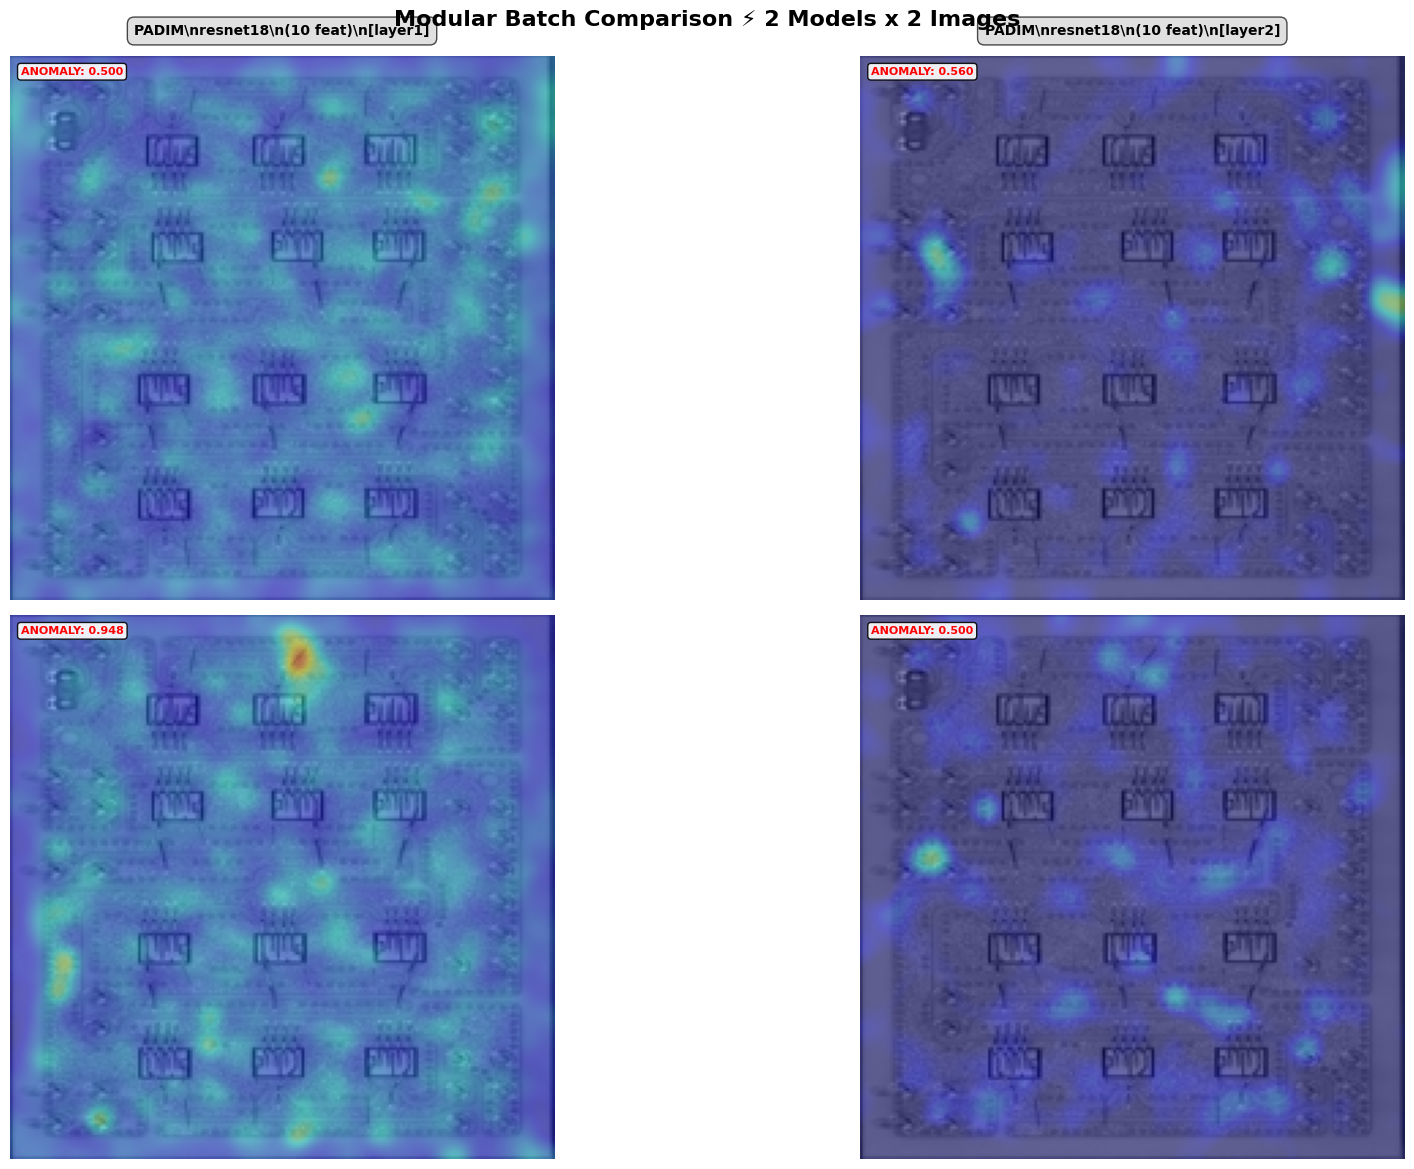

\n📊 MODULAR BATCH PROCESSING COMPLETE!
   🎯 Models processed: 2
   🖼️  Images processed: 2
   ✅ Successful operations: 4
   ❌ Failed operations: 0
   ⚡ Total inference time: 3.2s
   💾 Poster saved: /home/ai_dsx.work/data/projects/AD_tool_test/images/modular_batch_comparison_poster.png


In [ ]:
comparison_res = create_modular_batch_comparison_poster(
    search_results=test_results,
    test_images="/home/ai_dsx.work/data/projects/AD_tool_test/images/bad",
    max_models=4,
    max_test_images=6,
    run_validation_tests=False,
    show_original=False,
    device="auto",
    output_file=f"{data_root}/modular_batch_comparison_poster.png"
)

In [ ]:
# Rich results with detailed statistics
if comparison_res['success']:
    stats = comparison_res['batch_statistics']
    print(f"⚡ {stats['total_inference_time']:.1f}s total inference time")
    
    # Per-model performance analysis
    for model, model_stats in stats['model_results'].items():
        print(f"{model}: {model_stats['avg_time_per_image']:.3f}s/image")

⚡ 3.3s total inference time
padim_resnet18_10feat_layer1: 0.807s/image
padim_resnet18_10feat_layer2: 0.835s/image


In [ ]:
#| export
def diff_parameter_and_save_poster(
    data_root:str, # data root path
    normal_dir:str, # normal directory name
    abnormal_dir:str, # abnormal directory name
    class_name:str, # class name
    test_images:Union[str,Path,List], # test images path
    model_names:List[str]=['padim'], # model names
    backbones:List[str]=['wide_resnet50'], # backbones
    n_features_list:List[int]=[64], # number of features
    layers:List[List[str]]=[['layer1', 'layer2', 'layer3']], # layers
    max_epochs:int=10, # max epochs
    max_models:int=4, # max models
    max_test_images:int=10, # max test images
    run_validation_tests:bool=False, # run validation tests
    show_original:bool=False, # show original
    device:str="auto", # device
    figsize:Tuple[int,int]=(20,12), # figure size
    output_file:str=f"modular_batch_comparison_poster.png", # output file
    model_path_name:str=None, # model path
    result_path_name:str=None, # model name
    ):
    '''
    This function is used to train a model and save the poster.
    '''
    if model_path_name is None:
        model_path_name = "test_hyperparameter_results"
    if result_path_name is None:
        result_path_name = "test_hyperparameter_models"

    if model_names is None:
        model_names = ['padim']
    if backbones is None:
        backbones = ['resnet18']
    if n_features_list is None:
        n_features_list = [10]
    if layers is None:
        layers = [['layer1', 'layer2', 'layer3']]   

    
    test_results = simple_hyperparameter_search(
        data_root=data_root,  # Replace with your data path
        normal_dir=normal_dir,
        abnormal_dir=abnormal_dir,
        class_name=class_name,
        model_names=model_names,
        backbones=backbones,
        n_features_list=n_features_list,
        layers=layers,
        max_epochs=1,                    # Very quick training
        output_folder=f"{data_root}/{model_path_name}",
        save_path=f"{data_root}/{result_path_name}"
    )

    comparison_res = create_modular_batch_comparison_poster(
        search_results=test_results,
        test_images=test_images,
        max_models=max_models,
        max_test_images=max_test_images,
        run_validation_tests=run_validation_tests,
        show_original=show_original,
        device=device,
        figsize=figsize,
        output_file=output_file
    )
    # Rich results with detailed statistics
    if comparison_res['success']:
        stats = comparison_res['batch_statistics']
        print(f"⚡ {stats['total_inference_time']:.1f}s total inference time")
        
    # Per-model performance analysis
    for model, model_stats in stats['model_results'].items():
        print(f"{model}: {model_stats['avg_time_per_image']:.3f}s/image")

🔍 HYPERPARAMETER SEARCH - STEP 1: SIMPLE GRID SEARCH
📁 Data: /home/ai_dsx.work/data/projects/AD_tool_test/images
📁 Output: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_results
💾 Models: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models
🎯 Testing: 1 models × 1 backbones × 3 features × 2 layers
🧪 Total combinations to test: 6

🔄 Testing combination 1/6
   Model: padim
   Backbone: resnet18
   Features: 10
   Layer: ['layer1']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1'], 'n_features': 10}
 Added ThresholdCallback for padim
 St

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:12.575224
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer1/exports/test_hyperparam_padim_resnet18_10feat_layer1/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 13.2s

🔄 Testing combination 2/6
   Model: padim
   Backbone: resnet18
   Features: 10
   Layer: ['layer1', 'layer2', 'layer3']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1', 'layer2', 'layer3'], 'n_features': 10}


 Added ThresholdCallback for padim
 Starting training...


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:12.820164
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_10feat_layer1+layer2+layer3/exports/test_hyperparam_padim_resnet18_10feat_layer1+layer2+layer3/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 13.2s

🔄 Testing combination 3/6
   Model: padim
   Backbone: resnet18
   Features: 64
   Layer: ['layer1']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1'], 'n_features': 64}


 Added ThresholdCallback for padim
 Starting training...


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:14.192918
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_64feat_layer1/exports/test_hyperparam_padim_resnet18_64feat_layer1/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 14.7s

🔄 Testing combination 4/6
   Model: padim
   Backbone: resnet18
   Features: 64
   Layer: ['layer1', 'layer2', 'layer3']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1', 'layer2', 'layer3'], 'n_features': 64}


 Added ThresholdCallback for padim
 Starting training...


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:14.946306
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_64feat_layer1+layer2+layer3/exports/test_hyperparam_padim_resnet18_64feat_layer1+layer2+layer3/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 15.5s

🔄 Testing combination 5/6
   Model: padim
   Backbone: resnet18
   Features: 128
   Layer: ['layer1']
--------------------------------------------------
🤖 Jupyter environment detected - Applied smart defaults:
   • num_workers: 0 (multiprocessing-safe)
   • batch_size: 8 (memory-aware)
   • progress_bar: False (clean output)
   • accelerator: auto
 Starting training with padim model
 Normalization: min_max
 Image size: (256, 256)
 Threshold method: adaptive
folder_datamodule.transform: None
None
model_config: {'backbone': 'resnet18', 'layers': ['layer1'], 'n_features': 128}
❌ Training failed: For backbone resnet18, 0 < n_features <= 64, found 128
   ❌

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

 Training completed in 0:00:18.517260
 Exported torch: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_models/test_hyperparam_padim_resnet18_128feat_layer1+layer2+layer3/exports/test_hyperparam_padim_resnet18_128feat_layer1+layer2+layer3/weights/torch/model.pt
🎉 Training completed successfully!
   ✅ SUCCESS in 19.4s

📊 HYPERPARAMETER SEARCH COMPLETE!
✅ Successful trainings: 5/6
❌ Failed trainings: 1/6
📈 Success rate: 83.3%
💾 Results saved: /home/ai_dsx.work/data/projects/AD_tool_test/images/test_hyperparameter_results/hyperparameter_search_results_20250830_001039.json

🎯 Successfully trained models:
   • padim + resnet18 (10 feat, ['layer1']) - 13.15s
   • padim + resnet18 (10 feat, ['layer1', 'layer2', 'layer3']) - 13.22s
   • padim + resnet18 (64 feat, ['layer1']) - 14.7s
   • padim + resnet18 (64 feat, ['layer1', 'layer2', 'layer3']) - 15.53s
   • padim + resnet18 (128 feat, ['layer1', 'layer2', 'layer3']) - 19.37s

🚀 Ready for Step 2: Creating posters for ea

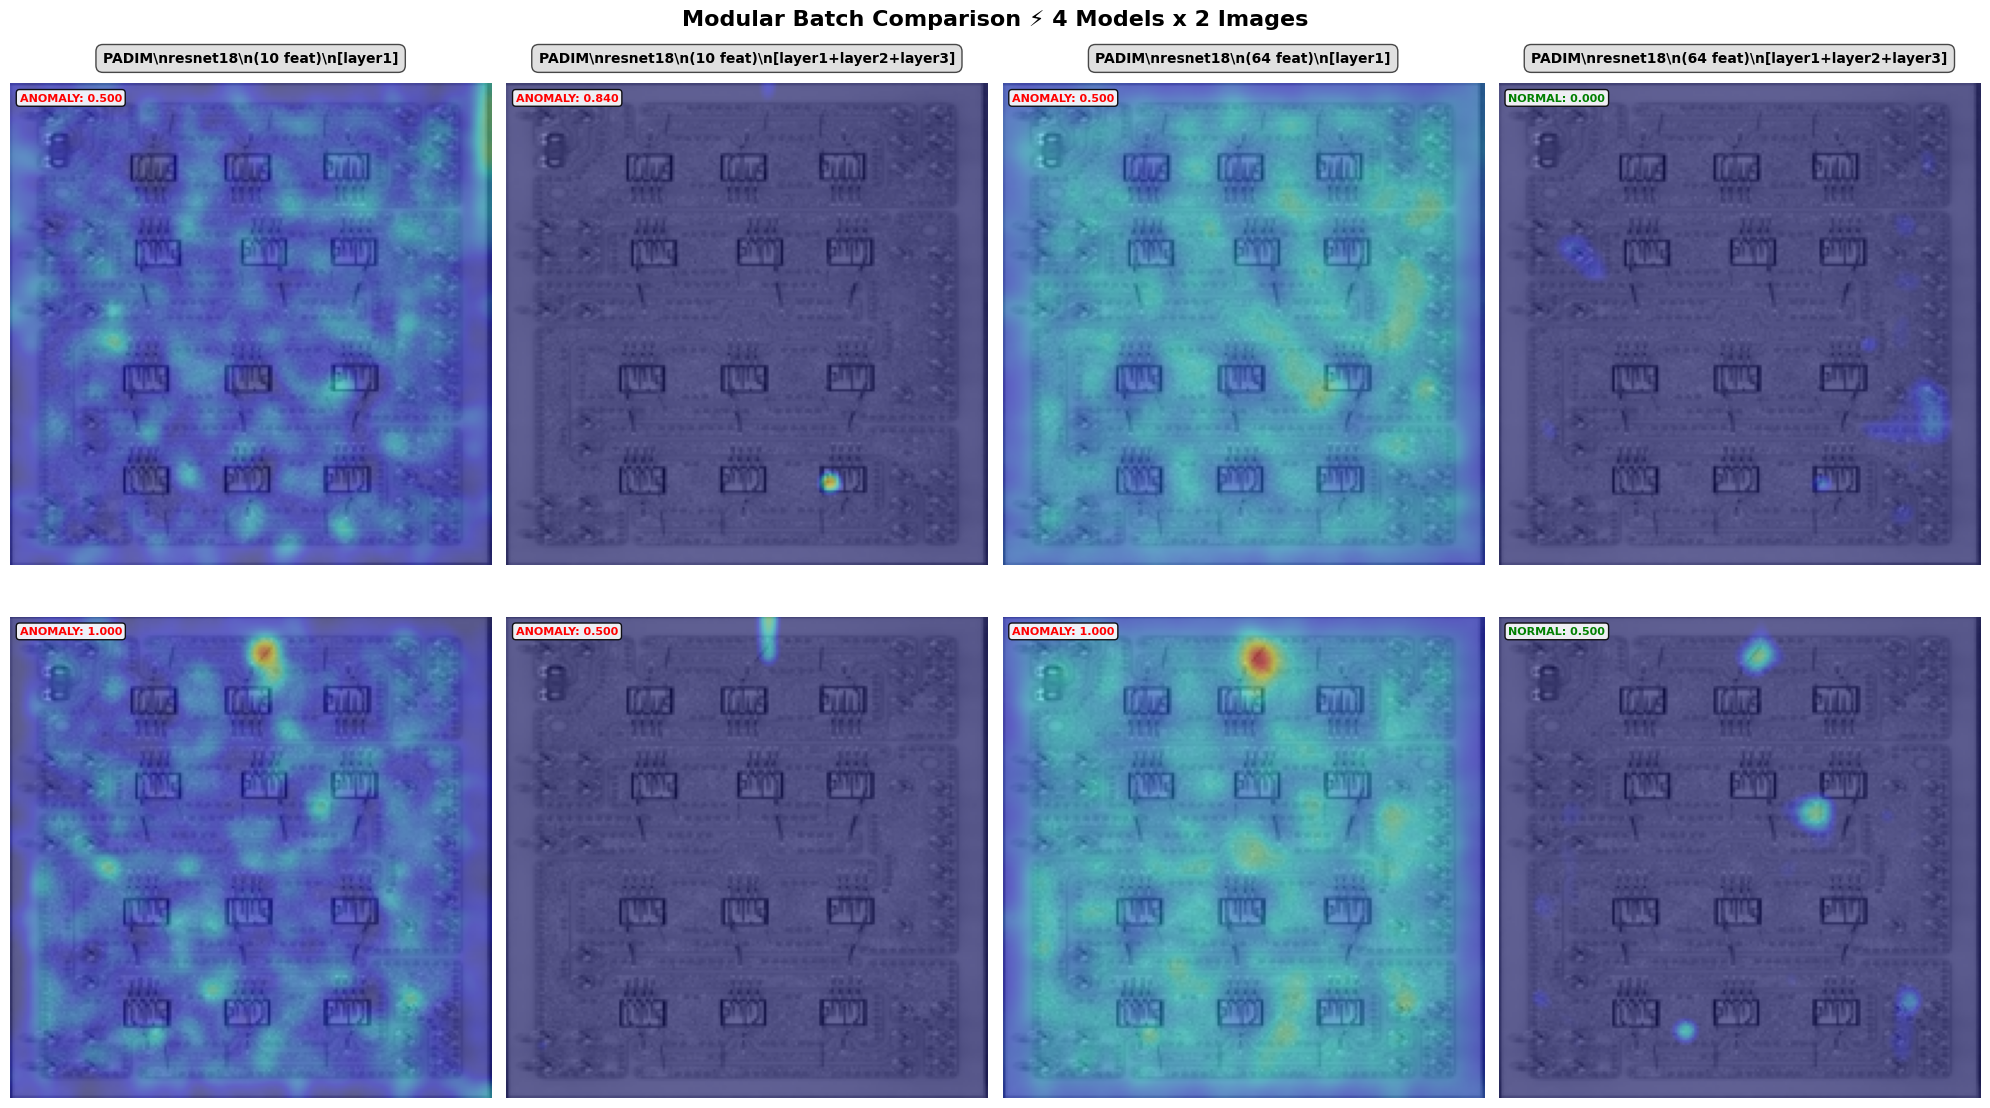

\n📊 MODULAR BATCH PROCESSING COMPLETE!
   🎯 Models processed: 4
   🖼️  Images processed: 2
   ✅ Successful operations: 8
   ❌ Failed operations: 0
   ⚡ Total inference time: 6.8s
   💾 Poster saved: /home/ai_dsx.work/data/projects/AD_tool_test/images/modular_batch_comparison_poster.png
⚡ 6.8s total inference time
padim_resnet18_10feat_layer1: 0.834s/image
padim_resnet18_10feat_layer1+layer2+layer3: 0.825s/image
padim_resnet18_64feat_layer1: 0.865s/image
padim_resnet18_64feat_layer1+layer2+layer3: 0.855s/image


In [ ]:
diff_parameter_and_save_poster(
    data_root="/home/ai_dsx.work/data/projects/AD_tool_test/images",
    normal_dir="good",
    abnormal_dir="bad",
    class_name="test_hyperparam",
    test_images="/home/ai_dsx.work/data/projects/AD_tool_test/images/bad",
    model_names=['padim'],
    backbones=['resnet18'],
    n_features_list=[10, 64, 128],
    layers=[['layer1'], ['layer1', 'layer2', 'layer3']],
    max_epochs=1,
    max_models=4,
    max_test_images=6,
    run_validation_tests=False,
    show_original=False,
    device="auto",
    output_file=f"{data_root}/modular_batch_comparison_poster.png"
)


In [93]:
cur_dir = Path(r'/home/ai_dsx.work/data/projects/be-vision-ad-tools/nbs')
os.chdir(cur_dir)

In [94]:
#| hide
import nbdev; nbdev.nbdev_export('07_training.hyperparameter_search.ipynb')

InterpolationMissingOptionError: Bad value substitution: option 'lib_name' in section 'DEFAULT' contains an interpolation key 'repo' which is not a valid option name. Raw value: '%(repo)s'